In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AffinityPropagation 
from scipy.spatial import distance
import matplotlib.pyplot as plt
import datetime

import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import sklearn.metrics as metrica
import matplotlib as mpl

%matplotlib inline

Carrega a base de dados e exibe os 5 primeiros pacientes

In [2]:
filepath = 'D:\\Projeto_PA\\pacientes_com_id.csv'
df = pd.read_csv(filepath,encoding='cp860',sep=';')
df.head()
# df.shape

,numero_identificacao,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,...,diast 6:00,diast 6:30,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,7,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,...,79.0,49.0,62.0,83.0,104.0,82.0,85.5,89.0,90.0,72.0
1,10,122.0,119.0,117.0,115.0,110.0,108.0,120.0,116.0,135.0,...,61.0,60.0,50.0,40.0,67.0,69.0,97.0,95.0,93.5,92.0
2,44,126.0,121.0,125.0,120.0,119.0,140.0,110.0,115.0,115.0,...,87.0,88.0,91.0,82.0,88.0,88.5,89.0,84.0,83.0,86.0
3,57,144.0,148.0,128.0,125.0,116.0,129.0,138.0,128.0,121.0,...,54.0,46.0,58.0,67.0,79.0,72.0,62.0,63.0,59.0,81.0
4,64,129.0,126.0,116.0,122.5,129.0,145.0,141.0,134.0,138.0,...,57.0,60.0,65.0,63.0,61.0,55.0,68.0,75.0,82.0,91.0


In [3]:
# Retira o id_patient da base

In [4]:
dataset_sem_id=df.loc[:,'sist 9:00':'diast 8:45']
dataset_sem_id.head()

,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,sist 11:15,...,diast 6:00,diast 6:30,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,136.0,...,79.0,49.0,62.0,83.0,104.0,82.0,85.5,89.0,90.0,72.0
1,122.0,119.0,117.0,115.0,110.0,108.0,120.0,116.0,135.0,126.0,...,61.0,60.0,50.0,40.0,67.0,69.0,97.0,95.0,93.5,92.0
2,126.0,121.0,125.0,120.0,119.0,140.0,110.0,115.0,115.0,106.0,...,87.0,88.0,91.0,82.0,88.0,88.5,89.0,84.0,83.0,86.0
3,144.0,148.0,128.0,125.0,116.0,129.0,138.0,128.0,121.0,117.0,...,54.0,46.0,58.0,67.0,79.0,72.0,62.0,63.0,59.0,81.0
4,129.0,126.0,116.0,122.5,129.0,145.0,141.0,134.0,138.0,134.0,...,57.0,60.0,65.0,63.0,61.0,55.0,68.0,75.0,82.0,91.0


## Aplicação do algoritmoAffinity Propagation com a métrica de distância Euclidiana

Calcular a matriz de similaridade (ou distância) utilzando a distância Euclidiana. O Dataset é um parâmetro

In [5]:
matriz_euclidiana=metrica.pairwise_distances(dataset_sem_id,dataset_sem_id,metric='euclidean')


In [6]:
matriz_euclidiana

array([[  0.        , 234.62949516, 228.4748345 , ..., 328.21943879,
        304.75687031, 228.83126972],
       [234.62949516,   0.        , 172.13439517, ..., 233.96901504,
        215.81531456, 156.44567747],
       [228.4748345 , 172.13439517,   0.        , ..., 172.67382546,
        177.97752667, 121.51131635],
       ...,
       [328.21943879, 233.96901504, 172.67382546, ...,   0.        ,
        145.17317245, 168.83794005],
       [304.75687031, 215.81531456, 177.97752667, ..., 145.17317245,
          0.        , 158.50552041],
       [228.83126972, 156.44567747, 121.51131635, ..., 168.83794005,
        158.50552041,   0.        ]])

Calcular a Similaridade entre essas medidas
160 é o número das medidas PAS e PAD de 1 paciente
Quanto mais similar (perto de mim mesma), a função retorna um número perto de 1 e quanto menos similar (longe de mim mesma, pois a métrica escolhida é a distância euclidiana), a função retorna um ponto perto de 0.

In [7]:
matriz_similaridade = np.exp(-matriz_euclidiana * (1/160))
matriz_similaridade

array([[1.        , 0.23074678, 0.23979576, ..., 0.12855847, 0.14886276,
        0.23926216],
       [0.23074678, 1.        , 0.3410112 , ..., 0.23170128, 0.25953967,
        0.37614315],
       [0.23979576, 0.3410112 , 1.        , ..., 0.33986343, 0.32878227,
        0.46792571],
       ...,
       [0.12855847, 0.23170128, 0.33986343, ..., 1.        , 0.40359946,
        0.34810987],
       [0.14886276, 0.25953967, 0.32878227, ..., 0.40359946, 1.        ,
        0.37133172],
       [0.23926216, 0.37614315, 0.46792571, ..., 0.34810987, 0.37133172,
        1.        ]])

In [8]:
# Aplicação do algoritmo Affinity Propagation com métrica de distância Euclidiana

In [23]:
afinidade=AffinityPropagation().fit(matriz_similaridade)
representante_indices = afinidade.cluster_centers_indices_
labels = afinidade.labels_

n_clusters_affinity = len(representante_indices)

print ('Número Estimado de Clusters com Distância EUCLIDIANA: %d' % n_clusters_affinity)

Número Estimado de Clusters: 34


In [24]:
# Mostra o paciente que representa melhor cada Cluster 
representante_indices

array([ 15,  33,  39,  52,  82, 100, 123, 148, 164, 169, 192, 217, 221,
       250, 323, 324, 333, 339, 353, 375, 382, 390, 411, 437, 470, 547,
       551, 555, 557, 563, 586, 616, 640, 657], dtype=int64)

In [25]:
# Informa em qual grupo está o 1o. paciente, depois o 2o. paciente em so on
labels

array([ 6,  2,  4, 11,  8, 33, 14,  4,  7, 30,  5,  2, 25, 17, 26,  0, 12,
       12, 16,  2,  1, 25,  3,  5, 14, 31, 20, 28, 19, 19, 25,  5, 19,  1,
       33, 11, 13, 20, 33,  2, 33,  2,  5,  3, 25, 10,  4,  3, 28, 33, 31,
        1,  3, 19, 10, 21, 18, 30,  0, 31, 22, 22, 13, 18, 13, 13,  2, 22,
       12, 32,  7,  9,  3, 17, 23,  8, 18,  7, 32, 31, 12, 22,  4,  3, 17,
        2, 30, 12,  1, 28,  6, 25, 19, 14, 13, 17, 28, 31, 33, 29,  5, 10,
       24, 33, 18,  7,  6,  9, 33, 31, 14, 24,  5,  5, 16,  6,  6,  5,  1,
       17, 20,  0,  1,  6, 19,  1,  5, 12, 10, 22,  1, 12, 20, 10,  8,  4,
        3,  2, 12, 22, 19, 22, 18,  9,  0,  9, 19,  5,  7,  7, 12, 22, 13,
        4, 11,  0, 16,  5,  9, 30,  6, 18, 33,  8,  8, 26, 18, 10, 26,  9,
        1, 33,  1, 24,  0,  2,  6, 19,  4, 17, 29, 32, 18,  1, 31, 20, 16,
       21, 25,  8, 17,  6, 10, 26,  1, 20, 25, 13, 22, 28,  4, 18, 10, 19,
        1,  0, 12, 19,  2, 17, 14, 33,  0,  6,  9, 21, 31, 11, 18,  1, 33,
       12,  5, 11, 22, 30

In [26]:
numero_cluster=1

In [27]:
# Varre a base de Labels para identificar quem atende a condição. No caso, a condição é o cluster =30
pacientes_do_cluster=np.where(labels==numero_cluster)
pacientes_do_cluster
plota_numero_pacientes=len(pacientes_do_cluster[0])

In [28]:
df.iloc[pacientes_do_cluster[0][1],0]

409

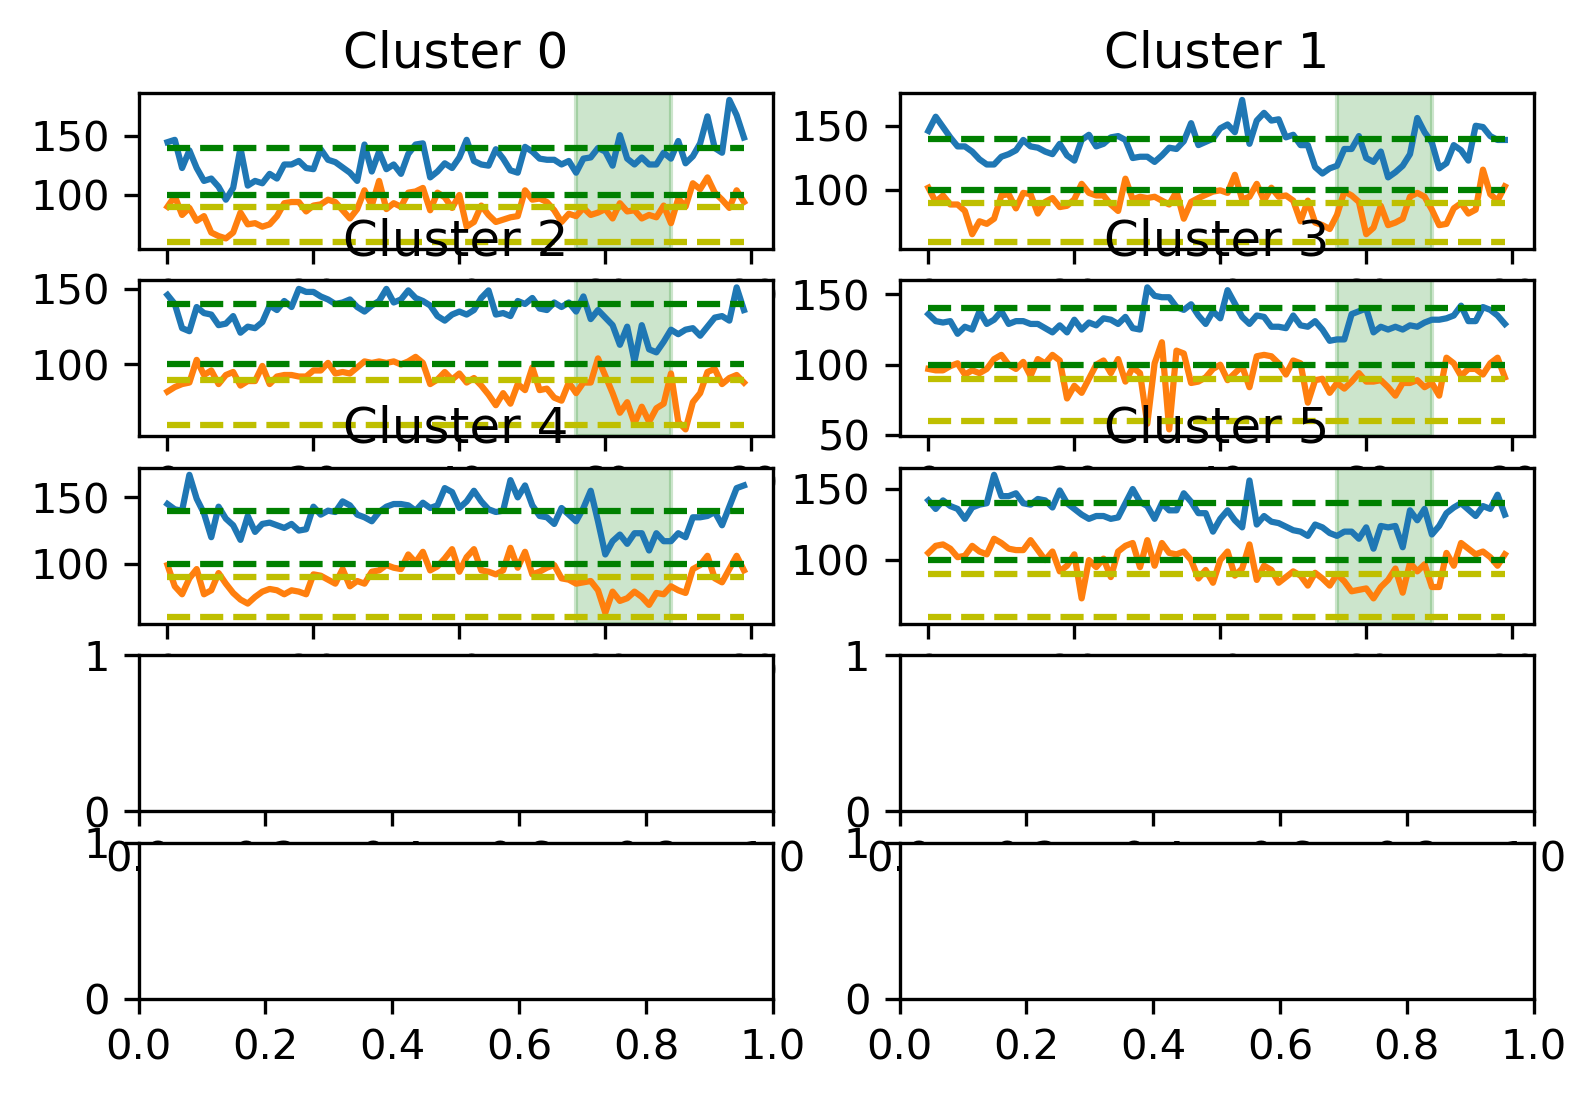

In [29]:
# Plotar as medidas de pacientes escolhidos no array acima
mpl.rcParams['figure.dpi']=(300)
start_noite = dataset_sem_id.columns.get_loc("sist 23:00")
end_noite = dataset_sem_id.columns.get_loc("sist 5:30")
#figure1, axs = plt.subplots(int(plota_numero_pacientes/2),2)
figure1, axs = plt.subplots(5,2)
#for i in range(int(np.around(plota_numero_pacientes/2))):
for i in range(3):
  index = pacientes_do_cluster[0][2*i]
  axs[i,0].plot(np.arange(80),dataset_sem_id.iloc[index,0:80])
  axs[i,0].plot(np.arange(80),dataset_sem_id.iloc[index,80:160])
  axs[i,0].plot(np.arange(80),140*np.ones((80,1)),'g--')
  axs[i,0].plot(np.arange(80),100*np.ones((80,1)),'g--')
  axs[i,0].plot(np.arange(80),90*np.ones((80,1)),'y--')
  axs[i,0].plot(np.arange(80),60*np.ones((80,1)),'y--')
  axs[i,0].axvspan(start_noite, end_noite, color='green', alpha=0.2)
  axs[i,0].set_title('Cluster {}'.format(2*i))
  index = pacientes_do_cluster[0][2*i+1]
  axs[i,1].plot(np.arange(80),dataset_sem_id.iloc[index,0:80])
  axs[i,1].plot(np.arange(80),dataset_sem_id.iloc[index,80:160])
  axs[i,1].plot(np.arange(80),140*np.ones((80,1)),'g--')
  axs[i,1].plot(np.arange(80),100*np.ones((80,1)),'g--')
  axs[i,1].plot(np.arange(80),90*np.ones((80,1)),'y--')
  axs[i,1].plot(np.arange(80),60*np.ones((80,1)),'y--')
  axs[i,1].axvspan(start_noite, end_noite, color='green', alpha=0.2)
  axs[i,1].set_title('Cluster {}'.format(2*i+1))

In [30]:
dataset_sem_id.iloc[index,1:81]


sist 9:15     136.0
sist 9:30     142.0
sist 9:45     138.0
sist 10:00    136.0
sist 10:15    129.0
              ...  
sist 8:00     138.0
sist 8:15     136.0
sist 8:30     146.0
sist 8:45     132.0
diast 9:00    105.0
Name: 122, Length: 80, dtype: float64

In [31]:
dataset_sem_id.loc[np.where(labels==numero_cluster)].to_csv(path_or_buf='D:\Projeto_PA\\quantitativos\\Pacientes_no_Cluster.csv',sep=';',index=False,encoding='UTF-8')

In [34]:
# SVG graphics saved paciente por tipo de cluster
mpl.rcParams['figure.dpi']=(300)
start_noite = dataset_sem_id.columns.get_loc("sist 23:00")
end_noite = dataset_sem_id.columns.get_loc("sist 5:30")
for j in range (n_clusters_affinity):
    pacientes_do_cluster=np.where(labels==j)
    plota_numero_pacientes=len(pacientes_do_cluster[0])
    for i in range(plota_numero_pacientes):
        id=df.iloc[pacientes_do_cluster[0][i],0]
        plt.plot(np.arange(80),dataset_sem_id.iloc[i,0:80])
        plt.plot(np.arange(80),dataset_sem_id.iloc[i,80:160])
        plt.plot(np.arange(80),140*np.ones((80,1)),'g--')
        plt.plot(np.arange(80),100*np.ones((80,1)),'g--')
        plt.plot(np.arange(80),90*np.ones((80,1)),'y--')
        plt.plot(np.arange(80),60*np.ones((80,1)),'y--')
        plt.axvspan(start_noite, end_noite, color='green', alpha=0.2)
        plt.title('Paciente '+str(id))
        plt.savefig('D:\Projeto_PA\graficos_SVG_Euclidiana\cluster'+str(j)+'paciente'+str(id)+'.svg',format="svg")
        plt.clf()  #clear na plotagem anterior para não mostrar um gráfico sobreposto ao outro

<Figure size 1800x1200 with 0 Axes>

#Aplicação do algoritmo Affinity Propagation com métrica de distância Euclidiana

In [37]:
#Calcular a matriz de similaridade (ou distância) utilzando a distância COSENO. Calcula o produto interno. Quão parecidos são de acordo com o ângulo dos vetores
matriz_coseno=metrica.pairwise_distances(dataset_sem_id,dataset_sem_id,metric='cosine')
matriz_similaridade_coseno = np.exp(-matriz_coseno * (1/160))
matriz_similaridade_coseno

afinidade=AffinityPropagation().fit(matriz_similaridade_coseno)
representante_indices = afinidade.cluster_centers_indices_
labels = afinidade.labels_

n_clusters_affinity = len(representante_indices)

print ('Número Estimado de Clusters com Distância COSENO: %d' % n_clusters_affinity)

Número Estimado de Clusters com Distância COSENO: 76


In [43]:
# SVG graphics saved paciente por tipo de cluster usando a métrica COSENO
mpl.rcParams['figure.dpi']=(300)
start_noite = dataset_sem_id.columns.get_loc("sist 23:00")
end_noite = dataset_sem_id.columns.get_loc("sist 5:30")
for j in range (n_clusters_affinity):
    pacientes_do_cluster=np.where(labels==j)
    plota_numero_pacientes=len(pacientes_do_cluster[0])
    for i in range(plota_numero_pacientes):
        id=df.iloc[pacientes_do_cluster[0][i],0]
        plt.plot(np.arange(80),dataset_sem_id.iloc[pacientes_do_cluster[0][i],0:80])
        plt.plot(np.arange(80),dataset_sem_id.iloc[pacientes_do_cluster[0][i],80:160])
        plt.plot(np.arange(80),140*np.ones((80,1)),'g--')
        plt.plot(np.arange(80),100*np.ones((80,1)),'g--')
        plt.plot(np.arange(80),90*np.ones((80,1)),'y--')
        plt.plot(np.arange(80),60*np.ones((80,1)),'y--')
        plt.axvspan(start_noite, end_noite, color='green', alpha=0.2)
        plt.title('Paciente '+str(id))
        plt.savefig('D:\Projeto_PA\graficos_SVG_Coseno\cluster'+str(j)+'paciente'+str(id)+'.svg',format="svg")
        plt.clf()  #clear na plotagem anterior para não mostrar um gráfico sobreposto ao outro

<Figure size 1800x1200 with 0 Axes>

(array([  3, 154, 248, 521, 524, 691], dtype=int64),)